In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

from collections import Counter

In [25]:
df = pd.read_csv('winequality-red.csv')

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


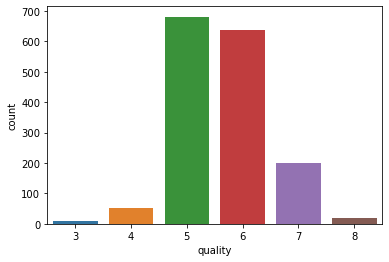

In [27]:
sns.countplot(x=df.quality);

In [28]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [29]:
# df["good"] = 0
# df.loc[df["quality"]>= 6, "good"] = 1

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Podział na zbiór treningowy i testowy

In [31]:
# Podział na zbiór treningowy i testowy
X = df.drop("quality", axis=1)
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = df.quality, random_state=0)
y_train.value_counts()

5    477
6    446
7    139
4     37
8     13
3      7
Name: quality, dtype: int64

### Oversampling / Undersampling

## KNN

In [51]:
%%capture --no-display

strategy_list = [{3: 277, 4: 277, 8: 277}, {3: 377, 4: 377, 8: 377}, {3: 477, 4: 477, 8: 477}, {3: 577, 4: 577, 8: 577}, {3: 677, 4: 677, 8: 677}]

train_list = []
test_list = []

for over in strategy_list:
    
    # instantiating over and under sampler                 
    over_strategy = SMOTE(sampling_strategy=over, random_state=20)

    X_combined, y_combined = over_strategy.fit_resample(X_train, y_train)
    
    # Normalizacja
    scaler = StandardScaler()
    scaler.fit(X_combined)

    X_train_std = scaler.transform(X_combined)
    X_test_std = scaler.transform(X_test)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

    # Model KNN

    model_KNN = KNeighborsClassifier(n_neighbors=7, p=1)
    model_KNN.fit(X_train_std, y_combined)

    train_score = cross_val_score(model_KNN, X_train_std, y_combined, cv=skf, scoring="roc_auc_ovr")
    test_score = roc_auc_score(y_test, model_KNN.predict_proba(X_test_std), multi_class='ovr')
    
    train_list.append(train_score.mean())
    test_list.append(test_score.mean())

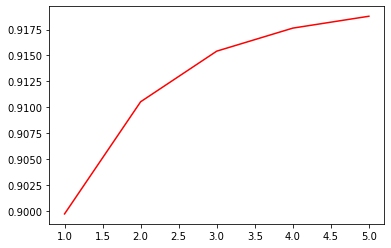

In [52]:
plt.plot(range(1, len(strategy_list)+1), train_list, "red")


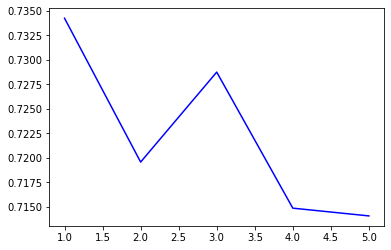

In [53]:
plt.plot(range(1, len(strategy_list)+1), test_list, "blue")

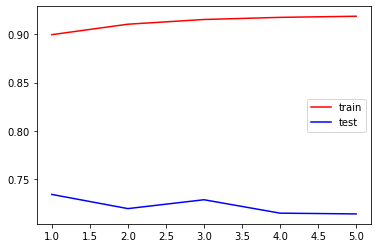

In [54]:
plt.plot(range(1, len(strategy_list)+1), train_list, "red")
plt.plot(range(1, len(strategy_list)+1), test_list, "blue")
plt.legend(["train", "test"])

## XGB

In [64]:
%%capture --no-display

strategy_list = [{3: 177, 4: 177, 8: 177}, {3: 277, 4: 277, 8: 277}, {3: 377, 4: 377, 8: 377}, {3: 477, 4: 477, 8: 477}, {3: 577, 4: 577, 8: 577}, {3: 677, 4: 677, 8: 677}]

train_list = []
test_list = []

for over in strategy_list:
    
    # instantiating over and under sampler                 
    over_strategy = SMOTE(sampling_strategy=over, random_state=20)

    X_combined, y_combined = over_strategy.fit_resample(X_train, y_train)
    
    # Normalizacja
    scaler = StandardScaler()
    scaler.fit(X_combined)

    X_train_std = scaler.transform(X_combined)
    X_test_std = scaler.transform(X_test)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
    
    # XgBoost

    model_xgb = xgb.XGBClassifier(random_state=12, booster='gbtree', learning_rate=0.1, 
                                  max_depth=10, n_estimators=150, num_class=6, 
                                  objective='multi:softmax', reg_alpha=1)
    
    model_xgb.fit(X_train_std, y_combined)

    train_score = cross_val_score(model_xgb, X_train_std, y_combined, cv=skf, scoring="roc_auc_ovr")

    test_score = roc_auc_score(y_test, model_xgb.predict_proba(X_test_std), multi_class="ovr")

    train_list.append(train_score.mean())
    test_list.append(test_score.mean())

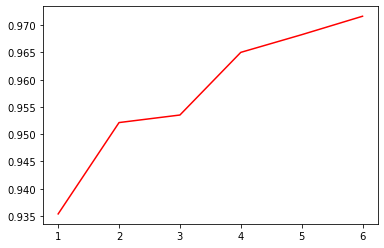

In [65]:
plt.plot(range(1, len(strategy_list)+1), train_list, "red")


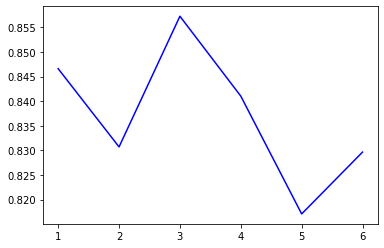

In [66]:
plt.plot(range(1, len(strategy_list)+1), test_list, "blue")

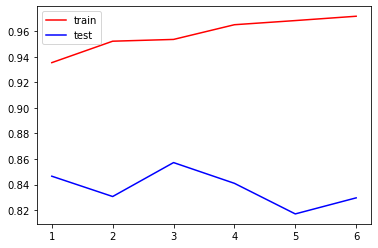

In [67]:
plt.plot(range(1, len(strategy_list)+1), train_list, "red")
plt.plot(range(1, len(strategy_list)+1), test_list, "blue")
plt.legend(["train", "test"])

## Random Forest

In [68]:
%%capture --no-display

strategy_list = [{3: 177, 4: 177, 8: 177}, {3: 277, 4: 277, 8: 277}, {3: 377, 4: 377, 8: 377}, {3: 477, 4: 477, 8: 477}, {3: 577, 4: 577, 8: 577}, {3: 677, 4: 677, 8: 677}]

train_list = []
test_list = []

for over in strategy_list:
    
    # instantiating over and under sampler                 
    over_strategy = SMOTE(sampling_strategy=over, random_state=20)

    X_combined, y_combined = over_strategy.fit_resample(X_train, y_train)
    
    # Normalizacja
    scaler = StandardScaler()
    scaler.fit(X_combined)

    X_train_std = scaler.transform(X_combined)
    X_test_std = scaler.transform(X_test)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
    
    # XgBoost

    model_RF_opt = RandomForestClassifier(random_state=12, max_depth=20, 
                                          max_features='auto', max_leaf_nodes= None, 
                                          min_samples_leaf=9, min_samples_split=13, 
                                          min_weight_fraction_leaf=0.0, n_estimators=72)
    
    model_RF_opt.fit(X_train_std, y_combined)

    train_score = cross_val_score(model_RF_opt, X_train_std, y_combined, cv=skf, scoring="roc_auc_ovr")

    test_score = roc_auc_score(y_test, model_RF_opt.predict_proba(X_test_std), multi_class="ovr")

    train_list.append(train_score.mean())
    test_list.append(test_score.mean())

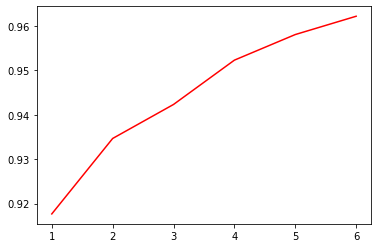

In [69]:
plt.plot(range(1, len(strategy_list)+1), train_list, "red")

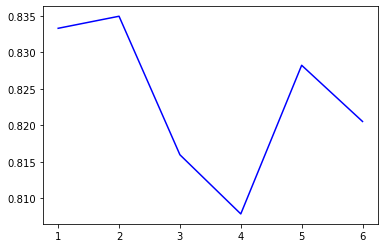

In [70]:
plt.plot(range(1, len(strategy_list)+1), test_list, "blue")

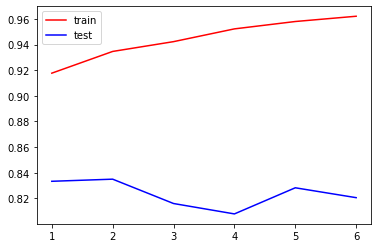

In [71]:
plt.plot(range(1, len(strategy_list)+1), train_list, "red")
plt.plot(range(1, len(strategy_list)+1), test_list, "blue")
plt.legend(["train", "test"])

## SVC

In [73]:
%%capture --no-display

strategy_list = [{3: 177, 4: 177, 8: 177}, {3: 277, 4: 277, 8: 277}, {3: 377, 4: 377, 8: 377}, {3: 477, 4: 477, 8: 477}, {3: 577, 4: 577, 8: 577}, {3: 677, 4: 677, 8: 677}]

train_list = []
test_list = []

for over in strategy_list:
    
    # instantiating over and under sampler                 
    over_strategy = SMOTE(sampling_strategy=over, random_state=20)

    X_combined, y_combined = over_strategy.fit_resample(X_train, y_train)
    
    # Normalizacja
    scaler = StandardScaler()
    scaler.fit(X_combined)

    X_train_std = scaler.transform(X_combined)
    X_test_std = scaler.transform(X_test)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
    
    # XgBoost

    model_SVC = SVC(random_state=12, C=50, degree=2, gamma=0.005, kernel='rbf', probability=True)
    
    model_SVC.fit(X_train_std, y_combined)

    train_score = cross_val_score(model_SVC, X_train_std, y_combined, cv=skf, scoring="roc_auc_ovr")

    test_score = roc_auc_score(y_test, model_SVC.predict_proba(X_test_std), multi_class="ovr")

    train_list.append(train_score.mean())
    test_list.append(test_score.mean())

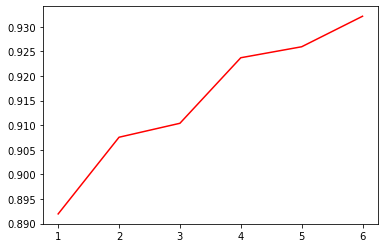

In [74]:
plt.plot(range(1, len(strategy_list)+1), train_list, "red")

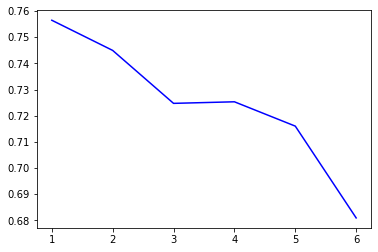

In [75]:
plt.plot(range(1, len(strategy_list)+1), test_list, "blue")

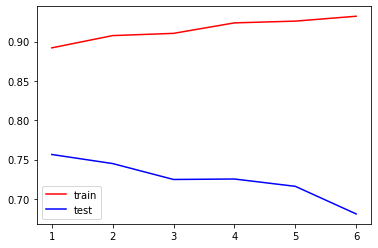

In [76]:
plt.plot(range(1, len(strategy_list)+1), train_list, "red")
plt.plot(range(1, len(strategy_list)+1), test_list, "blue")
plt.legend(["train", "test"])